**Домашнее задание** - Фильтрация картинок при помощи pytorch torch.nn.Conv2d

Прочитайте внимательно статью про то, что такое свёртка:

https://programforyou.ru/poleznoe/convolutional-network-from-scratch-part-zero-introduction

**Нужно отрицательные числа где-то преобразовать в нули, иначе при преобразовании из флоат в инт8 они могут стать огромными числами. А числа больше единицы должны быть единицей. В результирующем торч тензоре от 0 до 1 всё, иначе битые пиксели**

In [28]:
import torch
import torch.nn as nn
from PIL import Image
from torchvision import transforms

Пусть задана цветная картинка с изображением бабочки:

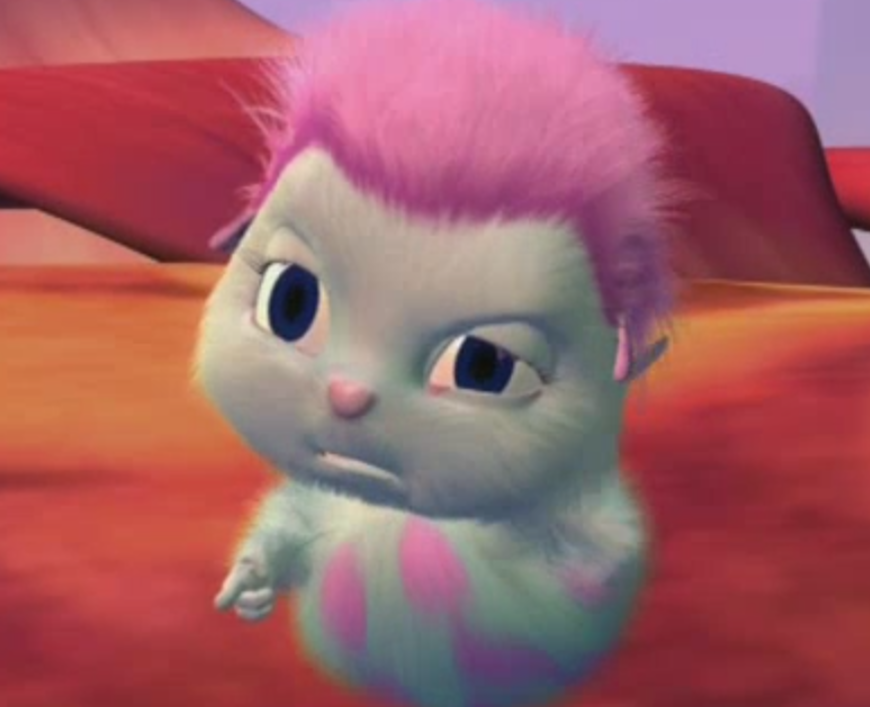

In [66]:
filename = 'bibl.png'
image = Image.open(filename)
image = image.convert('RGB')
image

Цель задания в том, чтобы реализовать функцию, которая бы по заданным входному изображению и матрицей размера 3x3, получала бы фильтрованное изображение, как на рисунке ниже:

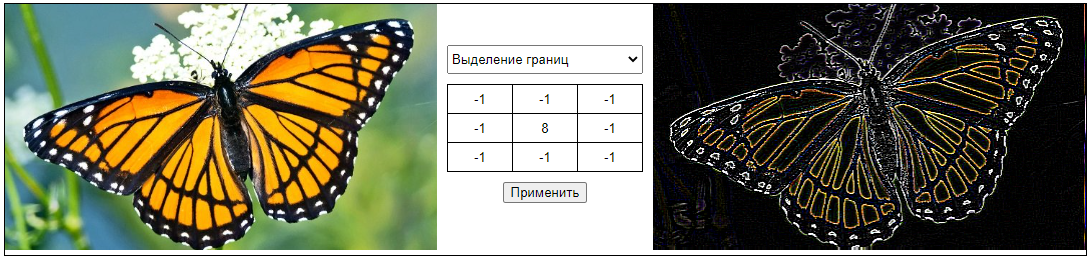

In [30]:
filename = 'laplace filter.png'
filter_example = Image.open(filename)
filter_example = filter_example.convert('RGB')
filter_example

Для реализации фильтра необходимо использовать свёртку, которая осуществляется модулем 'torch.nn.Conv2d'. В созданном объекте необходимо заменить имеющиеся веса на заданные веса фильтра, как в примере ниже:

In [67]:
conv_model = nn.Conv2d(in_channels = 3, out_channels = 3, kernel_size = 3, 
                       padding = 1, stride = 1, groups = 3, bias = False) # - конволюционный слой
print('Исходные случайные веса в слое:')
print(conv_model.weight)

Исходные случайные веса в слое:
Parameter containing:
tensor([[[[-0.2731, -0.2890, -0.1330],
          [ 0.0028, -0.0586, -0.1208],
          [-0.0856, -0.0494,  0.0790]]],


        [[[ 0.2514, -0.1883,  0.2432],
          [-0.3126,  0.3175,  0.1561],
          [-0.1563, -0.1169,  0.2944]]],


        [[[ 0.0291,  0.0408,  0.1400],
          [-0.0945, -0.2176,  0.1888],
          [-0.1408,  0.2024, -0.2470]]]], requires_grad=True)


In [56]:
W = torch.tensor([[[[0.,0,0],[0,1,0],[0,0,0]]], 
                 [[[0.,0,0],[0,0,0],[0,0,0]]],
                  [[[0.,0,0],[0,0,0],[0,0,0]]]])

with torch.no_grad(): # нужно использовать, иначе будет жаловаться
    conv_model.weight.copy_(W) # копируем в какой-то тензор другой тензор

print('Новые веса в слое:')
print(conv_model.weight)

Новые веса в слое:
Parameter containing:
tensor([[[[0., 0., 0.],
          [0., 1., 0.],
          [0., 0., 0.]]],


        [[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],


        [[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]]], requires_grad=True)


In [68]:
import numpy as np
np.array(image)

array([[[157,  77,  92],
        [158,  77,  92],
        [158,  77,  93],
        ...,
        [164, 140, 188],
        [164, 140, 188],
        [164, 140, 188]],

       [[157,  77,  92],
        [157,  77,  92],
        [158,  77,  93],
        ...,
        [164, 140, 188],
        [164, 140, 188],
        [164, 140, 188]],

       [[157,  76,  92],
        [157,  77,  92],
        [157,  77,  92],
        ...,
        [164, 140, 188],
        [164, 140, 188],
        [164, 140, 188]],

       ...,

       [[158,  51,  59],
        [158,  51,  59],
        [158,  51,  59],
        ...,
        [134,  45,  55],
        [134,  45,  55],
        [134,  45,  55]],

       [[158,  51,  59],
        [158,  51,  59],
        [158,  51,  59],
        ...,
        [132,  44,  55],
        [132,  44,  55],
        [133,  44,  55]],

       [[158,  51,  59],
        [158,  51,  59],
        [158,  51,  59],
        ...,
        [132,  44,  56],
        [132,  44,  56],
        [132,  44,  56]]

In [69]:
np.array(image).shape

(707, 870, 3)

Также необходимо научиться использовать стандартные трансформации из модуля 'torchvision.transforms' для того, чтобы преобразовывать картинку из формата, возвращаемого библиотекой 'PIL.Image' в 'torch.Tensor':
- transforms.ToTensor()
- transforms.ToPILImage()

In [70]:
t1 = transforms.ToTensor()
tensor_image = t1(image) # превращаем картинку в тензор
tensor_image.shape # перенесены каналы на первое место

torch.Size([3, 707, 870])

In [71]:
tensor_image

tensor([[[0.6157, 0.6196, 0.6196,  ..., 0.6431, 0.6431, 0.6431],
         [0.6157, 0.6157, 0.6196,  ..., 0.6431, 0.6431, 0.6431],
         [0.6157, 0.6157, 0.6157,  ..., 0.6431, 0.6431, 0.6431],
         ...,
         [0.6196, 0.6196, 0.6196,  ..., 0.5255, 0.5255, 0.5255],
         [0.6196, 0.6196, 0.6196,  ..., 0.5176, 0.5176, 0.5216],
         [0.6196, 0.6196, 0.6196,  ..., 0.5176, 0.5176, 0.5176]],

        [[0.3020, 0.3020, 0.3020,  ..., 0.5490, 0.5490, 0.5490],
         [0.3020, 0.3020, 0.3020,  ..., 0.5490, 0.5490, 0.5490],
         [0.2980, 0.3020, 0.3020,  ..., 0.5490, 0.5490, 0.5490],
         ...,
         [0.2000, 0.2000, 0.2000,  ..., 0.1765, 0.1765, 0.1765],
         [0.2000, 0.2000, 0.2000,  ..., 0.1725, 0.1725, 0.1725],
         [0.2000, 0.2000, 0.2000,  ..., 0.1725, 0.1725, 0.1725]],

        [[0.3608, 0.3608, 0.3647,  ..., 0.7373, 0.7373, 0.7373],
         [0.3608, 0.3608, 0.3647,  ..., 0.7373, 0.7373, 0.7373],
         [0.3608, 0.3608, 0.3608,  ..., 0.7373, 0.7373, 0.

In [72]:
tensor_image = tensor_image.unsqueeze(dim=0) # нейронке нравятся батчи, поэтому добавляем размерность для батча
tensor_image.shape # батч размера 1

torch.Size([1, 3, 707, 870])

In [73]:
result = conv_model(tensor_image)
#result

In [74]:
result.shape

torch.Size([1, 3, 707, 870])

In [75]:
result = result.squeeze(dim=0)
result.shape

torch.Size([3, 707, 870])

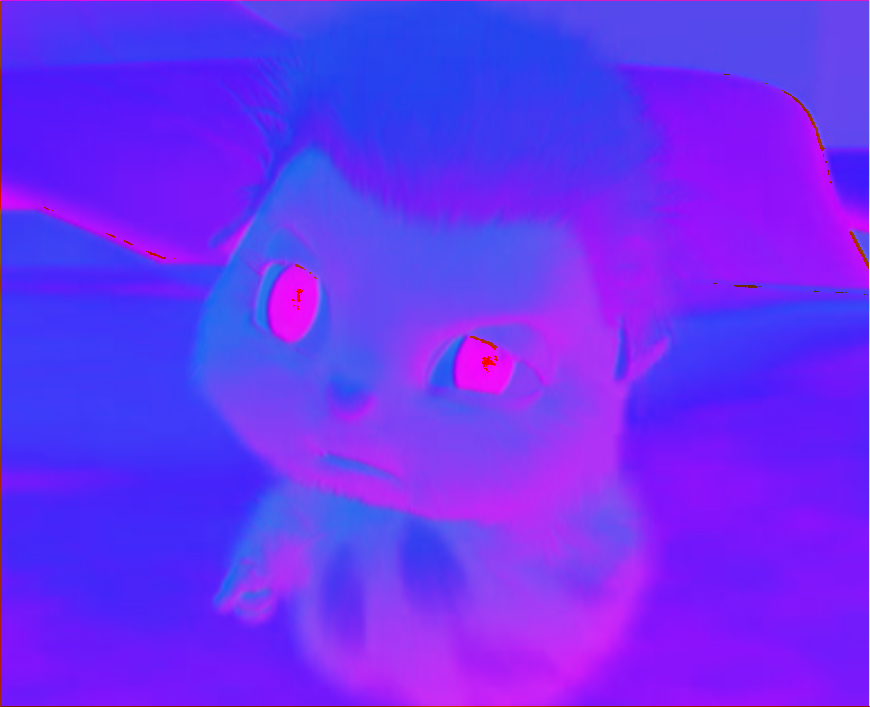

In [76]:
t2 = transforms.ToPILImage()
new_image = t2(result)
new_image

В данном примере преобразования привели к чёрно-белой одно-канальной картинке. Ваша же задача состоит в том, чтобы картинка после применения фильтра оставалась цветной трёх-канальной, а фильтр применялся к каждому из каналов по-отдельности.

Более того, результат применения фильтров должен совпадать с теми, что показаны в статье (ссылка на статью в самом вверху).